#***Codon usage machine learning project***
##Made by
###Juan José Aguado
###Emmanuel Collazos
###Santiago Peña

##Librerías

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, r2_score, mean_squared_error, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.src.layers.merging.maximum import maximum
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
try:
    import scikeras
except ImportError:
    !python -m pip install scikeras
from scikeras.wrappers import KerasClassifier
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

##Preprocesamiento

In [ ]:
dataset = pd.read_csv('/content/codon_usage.csv')
#print(dataset)

<ipython-input-2-81378b8ffc7b>:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/content/codon_usage.csv')


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

In [ ]:
#dataset["Kingdom"].value_counts()

In [ ]:
dataset.describe()

,DNAtype,SpeciesID,Ncodons,UUA,UUG,CUU,CUC,CUA,CUG,AUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,13028.000000,13028.000000,1.302800e+04,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,...,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000
mean,0.367209,130451.105926,7.960576e+04,0.020637,0.014104,0.017820,0.018288,0.019044,0.018450,0.028352,...,0.005454,0.009929,0.006422,0.024178,0.021164,0.028290,0.021683,0.001645,0.000592,0.006178
std,0.688726,124787.086107,7.197010e+05,0.020709,0.009280,0.010586,0.014572,0.024250,0.016578,0.017507,...,0.006605,0.008574,0.006387,0.013828,0.013041,0.014342,0.015018,0.001834,0.000907,0.010344
min,0.000000,7.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28850.750000,1.602000e+03,0.005610,0.007108,0.010890,0.007830,0.005307,0.007180,0.016360,...,0.001220,0.001690,0.001170,0.012380,0.011860,0.017360,0.009710,0.000560,0.000000,0.000410
50%,0.000000,81971.500000,2.927500e+03,0.015260,0.013360,0.016130,0.014560,0.009685,0.012800,0.025475,...,0.003530,0.009270,0.004545,0.025420,0.019070,0.026085,0.020540,0.001380,0.000420,0.001130
75%,1.000000,222891.250000,9.120000e+03,0.029485,0.019810,0.022730,0.025112,0.017245,0.024315,0.038113,...,0.007150,0.015922,0.010250,0.034190,0.027690,0.036800,0.031122,0.002370,0.000830,0.002890
max,12.000000,465364.000000,4.066258e+07,0.151330,0.101190,0.089780,0.100350,0.163920,0.107370,0.154060,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


In [ ]:
X = dataset.iloc[:, 1:69].values
y = dataset.iloc[:, 0].values
X = np.delete(X, [1, 3], axis=1)

In [ ]:
print(X)
print(y)
#print(X[y])

[[0 1995 '0.01654' ... 0.00251 0.0005 0.0]
 [0 1474 '0.02714' ... 0.00271 0.00068 0.0]
 [0 4862 '0.01974' ... 0.00391 0.0 0.00144]
 ...
 [1 1686 0.01423 ... 0.00356 0.00119 0.02017]
 [0 40662582 0.01757 ... 0.00099 0.00079 0.00156]
 [1 8998998 0.01778 ... 0.00156 0.00114 0.02161]]
['vrl' 'vrl' 'vrl' ... 'pri' 'pri' 'pri']


In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
for x in X:
  if '-' in x:
    x[3] = 0

In [ ]:
print(y)

[9 9 9 ... 7 7 7]


In [ ]:
for x in X:
  if "non-B hepatitis virus" in x or "12;I" in x:
    x[2] = 0
for x in X:
  if type(x[2]) == type("wenas"):
    x[2] = float(x[2])

print(X)

[[0 1995 0.01654 ... 0.00251 0.0005 0.0]
 [0 1474 0.02714 ... 0.00271 0.00068 0.0]
 [0 4862 0.01974 ... 0.00391 0.0 0.00144]
 ...
 [1 1686 0.01423 ... 0.00356 0.00119 0.02017]
 [0 40662582 0.01757 ... 0.00099 0.00079 0.00156]
 [1 8998998 0.01778 ... 0.00156 0.00114 0.02161]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#K-medias / Reducción

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

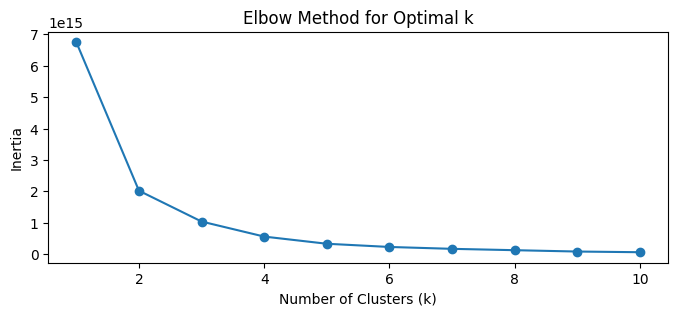

In [ ]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(X)  # X is your data
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 3))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

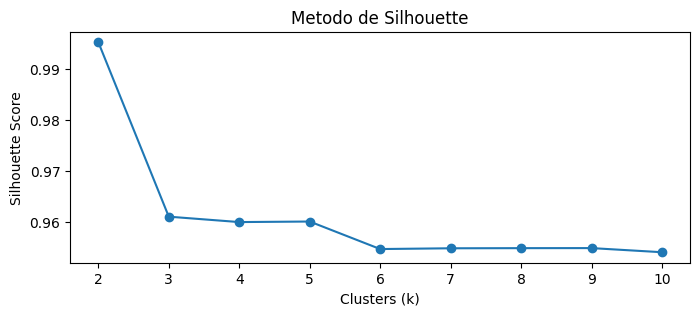

In [ ]:
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Metodo de Silhouette')
plt.show()

k=2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


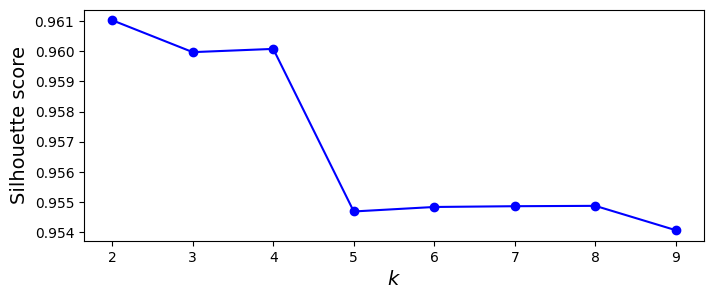

In [ ]:
k_range = range(2, 11, 1)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    kmeans_per_k.append(kmeans)

silhouette_score(X, kmeans.labels_)
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

##Nuevo Corpus

In [ ]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=9)
kmeans.fit(X)

#Aplicar transform para obtener las distancias a los centroides
corpus1 = kmeans.transform(X)

#Asignar cada elemento og a un clúster
etiquetas = kmeans.predict(X)

#Sacar los x y y
X_train1, X_test1, y_train1, y_test1 = train_test_split(corpus1, etiquetas, test_size=0.2, random_state=1)
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#**Regresión logística**

##Modelo Base

* Preprocesado original

In [ ]:
classifier = LogisticRegression(random_state = 0, max_iter=5000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 6  2]
 [ 2  2]
 [ 9  9]
 ...
 [ 1  1]
 [10 10]
 [ 6  6]]


* Corpus 1

In [ ]:
classifier1 = LogisticRegression(random_state = 0, max_iter=5000)
classifier1.fit(X_train1, y_train1)

LogisticRegression(max_iter=5000, random_state=0)

In [ ]:
y_pred1 = classifier1.predict(X_test1)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test1.reshape(len(y_test1),1)),1))

[[ 0  0]
 [ 0  0]
 [ 0 27]
 ...
 [ 0 27]
 [ 0  0]
 [35 35]]


##Modelo Optimizado

* Preprocesado original

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']}

grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Mejor Accuracy: {:.2f} %".format(best_accuracy*100))
print("Mejores hiperparámetros para regresión logística:", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Mejor Accuracy: 86.72 %
Mejores hiperparámetros para regresión logística: {'C': 1, 'penalty': 'l2'}


* Corpus 1

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']}

grid_search1 = GridSearchCV(classifier1, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search1.fit(X_train1, y_train1)

best_params1 = grid_search1.best_params_
best_accuracy1 = grid_search1.best_score_

print("Mejor Accuracy: {:.2f} %".format(best_accuracy1*100))
print("Mejores hiperparámetros para regresión logística:", best_params1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_sol

Mejor Accuracy: 96.21 %
Mejores hiperparámetros para regresión logística: {'C': 10, 'penalty': 'l2'}


##Evaluación

* Preprocesado original

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Matriz de Confusión:\n{confusion}')
print(f'Precisión: {precision}')
print(f'Recall: {recall}')
print(f'Puntuación F1: {f1}')
print(f'R-cuadrado: {r2}')
print(f'Error Cuadrático Medio (MSE): {mse}')

Accuracy: 0.8683806600153492
Matriz de Confusión:
[[ 20   6   0   0   1   0   0   0   0   2   0]
 [  3 574   2   0   5   0  10   0   0   9   1]
 [  0  10 187   1   1   0  52   1   5  35   9]
 [  0   0   0  80   0   0   0   6   4   1  11]
 [  0  19   0   0  24   0   0   0   0   3   0]
 [  0   5   0   0   0   0   0   0   0   0   0]
 [  0   5  20   2   0   0 420   1   0  14   2]
 [  0   0   0   4   0   0   0  23   3   0   7]
 [  0   0   0   6   0   0   0   1  22   0  11]
 [  0   6  12   0   1   0  16   2   1 556   4]
 [  0   1   6   5   0   0   2   3   3   3 357]]
Precisión: 0.7270634319900459
Recall: 0.6830304744137475
Puntuación F1: 0.7006498109638024
R-cuadrado: 0.7434994519901723
Error Cuadrático Medio (MSE): 3.2486569455103607


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Corpus 1

In [ ]:
accuracy = accuracy_score(y_test1, y_pred1)
confusion = confusion_matrix(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1, average='macro')
recall = recall_score(y_test1, y_pred1, average='macro')
f1 = f1_score(y_test1, y_pred1, average='macro')
r2 = r2_score(y_test1, y_pred1)
mse = mean_squared_error(y_test1, y_pred1)
print(f'Accuracy: {accuracy}')
print(f'Matriz de Confusión:\n{confusion}')
print(f'Precisión: {precision}')
print(f'Recall: {recall}')
print(f'Puntuación F1: {f1}')
print(f'R-cuadrado: {r2}')
print(f'Error Cuadrático Medio (MSE): {mse}')

Accuracy: 0.8564850345356869
Matriz de Confusión:
[[1908    0    0 ...    0    0    0]
 [   0    6    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    3    0 ...    0    2    0]
 [   0    0    0 ...    0    0    0]]
Precisión: 0.4726723050466335
Recall: 0.5501220740990562
Puntuación F1: 0.48729688165419344
R-cuadrado: 0.6407109852909733
Error Cuadrático Medio (MSE): 65.10437452033769


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**Naive Bayes**

##Modelo Base

* Preprocesado original

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 9  2]
 [ 9  2]
 [ 9  9]
 ...
 [ 1  1]
 [10 10]
 [ 6  6]]


* Corpus 1

In [ ]:
classifier1 = GaussianNB()
classifier1.fit(X_train1, y_train1)

GaussianNB()

In [ ]:
y_pred1 = classifier1.predict(X_test1)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test1.reshape(len(y_test1),1)),1))

[[ 0  0]
 [ 0  0]
 [27 27]
 ...
 [27 27]
 [ 0  0]
 [35 35]]


##Modelo Optimizado

* Preprocesado original

In [ ]:
param_grid = {
    'priors': [None, [0.2, 0.8], [0.5, 0.5]],
    'var_smoothing': [1e-9, 1e-7]}

grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', n_jobs = -1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Mejor Accuracy: {:.2f} %".format(best_accuracy * 100))
print("Mejores hiperparámetros para Naive Bayes:", best_params)

Mejor Accuracy: 55.53 %
Mejores hiperparámetros para Naive Bayes: {'priors': None, 'var_smoothing': 1e-07}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 267, in fit
    return self._partial_fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 454, in _partial_fit
    raise ValueError("Number of priors must match number of classes.")
ValueError: Number of prio

* Corpus 1

In [ ]:
param_grid = {
    'priors': [None, [0.2, 0.8], [0.5, 0.5]],
    'var_smoothing': [1e-9, 1e-7]}

grid_search1 = GridSearchCV(classifier1, param_grid, cv=5, scoring='accuracy', n_jobs = -1)
grid_search1.fit(X_train1, y_train1)

best_params1 = grid_search1.best_params_
best_accuracy1 = grid_search1.best_score_

print("Mejor Accuracy: {:.2f} %".format(best_accuracy1 * 100))
print("Mejores hiperparámetros para Naive Bayes:", best_params1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Mejor Accuracy: 94.91 %
Mejores hiperparámetros para Naive Bayes: {'priors': None, 'var_smoothing': 1e-07}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 267, in fit
    return self._partial_fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 454, in _partial_fit
    raise ValueError("Number of priors must match number of classes.")
ValueError: Number of prio

##Evaluación

* Preprocesado original

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Matriz de Confusión:\n{confusion}')
print(f'Precisión: {precision}')
print(f'Recall: {recall}')
print(f'Puntuación F1 (F1-Score): {f1}')

Accuracy: 0.5448963929393706
Matriz de Confusión:
[[ 22   4   0   0   0   0   0   0   0   3   0]
 [ 33 211  26   0 118  80  21   0   0 115   0]
 [  9  25 109   2  14   2  10   0   2 124   4]
 [  0   0   0  82   0   0   1   7   1  11   0]
 [  1   1   0   0  33   4   0   0   0   7   0]
 [  0   0   0   0   0   5   0   0   0   0   0]
 [ 11  49  24   0   5   8 194   1   0 171   1]
 [  0   2   0   8   0   0   0   8   2   6  11]
 [  0   0   0  26   0   0   0   3   5   6   0]
 [  5  32  11   0  10   0   1   0   0 538   1]
 [  1  12  13  75   0   0   0   4   0  62 213]]
Precisión: 0.48136040761102966
Recall: 0.5646280989948194
Puntuación F1 (F1-Score): 0.420190670029825
R-cuadrado: 0.046166991206544106
Error Cuadrático Medio (MSE): 12.080583269378357


* Corpus 1

In [ ]:
accuracy = accuracy_score(y_test1, y_pred1)
confusion = confusion_matrix(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1, average='macro')
recall = recall_score(y_test1, y_pred1, average='macro')
f1 = f1_score(y_test1, y_pred1, average='macro')
print(f'Accuracy: {accuracy}')
print(f'Matriz de Confusión:\n{confusion}')
print(f'Precisión: {precision}')
print(f'Recall: {recall}')
print(f'Puntuación F1: {f1}')

Accuracy: 0.9497313891020721
Matriz de Confusión:
[[1815    0    0 ...    0    0    0]
 [   0    6    0 ...    0    0    0]
 [   0    0    2 ...    0    0    0]
 ...
 [   0    0    0 ...    7    0    0]
 [   0    0    0 ...    0    5    0]
 [   0    0    0 ...    0    0   11]]
Precisión: 0.9003487651388435
Recall: 0.9287454226973807
Puntuación F1: 0.9085623848526784


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**K-vecinos**

##Modelo Base

* Preprocesado original

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

* Corpus 1

In [ ]:
classifier1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier1.fit(X_train1, y_train1)
y_pred1 = classifier1.predict(X_test1)

##Modelo Optimizado

* Preprocesado original

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Número de vecinos cercanos
    'weights': ['uniform', 'distance'],  # Método de ponderación
    'p': [1, 2]  # Parámetro de distancia (1 para la distancia de Manhattan, 2 para la distancia Euclidiana)
}

grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Mejor Accuracy: {:.2f} %".format(best_accuracy*100))
print("Mejores hiperparámetros para los K-Vecinos:", best_params)

Mejor Accuracy: 92.81 %
Mejores hiperparámetros para los K-Vecinos: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


* Corpus 1

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Número de vecinos cercanos
    'weights': ['uniform', 'distance'],  # Método de ponderación
    'p': [1, 2]  # Parámetro de distancia (1 para la distancia de Manhattan, 2 para la distancia Euclidiana)
}

grid_search1 = GridSearchCV(classifier1, param_grid, cv=5, scoring='accuracy')
grid_search1.fit(X_train1, y_train1)

best_params1 = grid_search1.best_params_
best_accuracy1 = grid_search1.best_score_

print("Mejor Accuracy: {:.2f} %".format(best_accuracy1*100))
print("Mejores hiperparámetros para los K-Vecinos:", best_params1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Mejor Accuracy: 99.76 %
Mejores hiperparámetros para los K-Vecinos: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


##Evaluación

In [ ]:
y_pred = classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Matriz de Confusión:\n{confusion}')
print(f'Precisión: {precision}')
print(f'Recall: {recall}')
print(f'Puntuación F1: {f1}')
print(f'R-cuadrado: {r2}')
print(f'Error Cuadrático Medio (MSE): {mse}')

Accuracy: 0.9240214888718342
Matriz de Confusión:
[[ 25   3   0   0   0   0   1   0   0   0   0]
 [  3 583   4   0   7   0   3   0   0   4   0]
 [  1  11 254   2   0   0  23   0   0   4   6]
 [  0   0   0  87   0   0   0   5   4   0   6]
 [  0  12   0   0  30   0   3   0   0   1   0]
 [  0   5   0   0   0   0   0   0   0   0   0]
 [  0   4   9   0   0   0 446   0   0   4   1]
 [  0   0   0   5   0   0   0  30   0   1   1]
 [  0   0   0   3   0   0   0   4  31   1   1]
 [  1   5   9   1   0   0  15   1   2 564   0]
 [  0   1   3   4   0   0   2   5   5   2 358]]
Precisión: 0.7801570275331394
Recall: 0.7825942224489314
Puntuación F1: 0.7796503953376401
R-cuadrado: 0.8738402690865907
Error Cuadrático Medio (MSE): 1.597851112816577


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Corpus1

In [ ]:
y_pred1 = classifier1.predict(X_test1)


accuracy1 = accuracy_score(y_test1, y_pred1)
confusion1 = confusion_matrix(y_test1, y_pred1)
precision1 = precision_score(y_test1, y_pred1, average='macro')
recall1 = recall_score(y_test1, y_pred1, average='macro')
f11 = f1_score(y_test1, y_pred1, average='macro')
r21 = r2_score(y_test1, y_pred1)
mse1 = mean_squared_error(y_test1, y_pred1)
print(f'Accuracy: {accuracy1}')
print(f'Matriz de Confusión:\n{confusion1}')
print(f'Precisión: {precision1}')
print(f'Recall: {recall1}')
print(f'Puntuación F1: {f11}')
print(f'R-cuadrado: {r21}')
print(f'Error Cuadrático Medio (MSE): {mse1}')

Accuracy: 0.998848810437452
Matriz de Confusión:
[[1907    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    6 ...    0    0    0]
 ...
 [   0    0    0 ...    7    0    0]
 [   0    0    0 ...    0    5    0]
 [   0    0    0 ...    0    0   11]]
Precisión: 0.9397269104547585
Recall: 0.937485441416259
Puntuación F1: 0.9378996349161661
R-cuadrado: 0.9973529059637026
Error Cuadrático Medio (MSE): 0.47966231772831924


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**Arboles de decisión**

##Modelo Base

* Preprocesado original

In [ ]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

* Corpus 1

In [ ]:
classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier1.fit(X_train1, y_train1)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred1 = classifier1.predict(X_test1)

##Modelo Optimizado

* Preprocesado original

In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2,3,4,5,6]}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           refit = True,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best (k-fold) Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best (k-fold) Parameters:", best_parameters)

* Corpus 1

In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2,3,4,5,6]}
grid_search = GridSearchCV(estimator = classifier1,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           refit = True,
                           n_jobs = -1)
grid_search.fit(X_train1, y_train1)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_model1 = grid_search.best_estimator_
print("Best (k-fold) Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best (k-fold) Parameters:", best_parameters)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best (k-fold) Accuracy: 96.75 %
Best (k-fold) Parameters: {'criterion': 'entropy', 'max_depth': 6, 'splitter': 'random'}


##Evaluación

* Preprocesado original

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Matriz de Confusión:\n{confusion}')
print(f'Precisión: {precision}')
print(f'Recall: {recall}')
print(f'Puntuación F1 (F1-Score): {f1}')
print(f'R-cuadrado: {r2}')
print(f'Error Cuadrático Medio (MSE): {mse}')

In [ ]:
y_pred = best_model.predict(X_test)
cm_best = confusion_matrix(y_test, y_pred)
print(cm_best)
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

* Corpus 1

In [ ]:
accuracy = accuracy_score(y_test1, y_pred1)
confusion = confusion_matrix(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1, average='macro')
recall = recall_score(y_test1, y_pred1, average='macro')
f1 = f1_score(y_test1, y_pred1, average='macro')
r2 = r2_score(y_test1, y_pred1)
mse = mean_squared_error(y_test1, y_pred1)
print(f'Accuracy: {accuracy}')
print(f'Matriz de Confusión:\n{confusion}')
print(f'Precisión: {precision}')
print(f'Recall: {recall}')
print(f'Puntuación F1 (F1-Score): {f1}')
print(f'R-cuadrado: {r2}')
print(f'Error Cuadrático Medio (MSE): {mse}')

Accuracy: 0.9976976208749041
Matriz de Confusión:
[[1907    0    0 ...    0    0    0]
 [   0    6    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    7    0    0]
 [   0    0    0 ...    0    5    0]
 [   0    0    0 ...    0    0   11]]
Precisión: 0.9336812103986419
Recall: 0.9230501987201468
Puntuación F1 (F1-Score): 0.9264145823627177
R-cuadrado: 0.9946994589017182
Error Cuadrático Medio (MSE): 0.9604758250191865


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred1 = best_model1.predict(X_test1)
cm_best = confusion_matrix(y_test1, y_pred1)
print(cm_best)
print(classification_report(y_test1, y_pred1))

#**Random Forest**

##Modelo Base

* Preprocesado original

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

* Corpus 1

In [ ]:
classifier1 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier1.fit(X_train1, y_train1)
y_pred1 = classifier1.predict(X_test1)

##Modelo Optimizado

* Preprocesado original

In [ ]:
param_grid = {
    'n_estimators': [100, 200], #Numero de arboles
    'max_depth': [None, 10, 20],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 7], # Mínimo de muestras para dividir
    'min_samples_leaf': [1, 2, 4] # Mínimo de muestras en hojas

}

grid_search = GridSearchCV(classifier, param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Mejor Accuracy: {:.2f} %".format(best_accuracy*100))
print("Mejores hiperparámetros para los Random Forest:", best_params)

Mejor Accuracy: 88.64 %
Mejores hiperparámetros para los Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

grid_search = GridSearchCV(classifier, param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Mejor Accuracy: {:.2f} %".format(best_accuracy*100))
print("Mejores hiperparámetros para los Random Forest:", best_params)

Mejor Accuracy: 89.10 %
Mejores hiperparámetros para los Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


* Corpus 1

In [ ]:
param_grid = {
    'n_estimators': [100, 200], #Numero de arboles
    'max_depth': [None, 10],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5], # Mínimo de muestras para dividir
    'min_samples_leaf': [1, 2] # Mínimo de muestras en hojas

}

grid_search1 = GridSearchCV(classifier1, param_grid, cv=2, scoring='accuracy')
grid_search1.fit(X_train1, y_train1)

best_params1 = grid_search1.best_params_
best_accuracy1 = grid_search1.best_score_

print("Mejor Accuracy: {:.2f} %".format(best_accuracy1*100))
print("Mejores hiperparámetros para los Random Forest:", best_params1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Mejor Accuracy: 99.67 %
Mejores hiperparámetros para los Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}


grid_search1 = GridSearchCV(classifier1, param_grid, cv=2, scoring='accuracy')
grid_search1.fit(X_train1, y_train1)

best_params1 = grid_search1.best_params_
best_accuracy1 = grid_search1.best_score_

print("Mejor Accuracy: {:.2f} %".format(best_accuracy1*100))
print("Mejores hiperparámetros para los Random Forest:", best_params1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Mejor Accuracy: 99.67 %
Mejores hiperparámetros para los Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


##Evaluación

In [ ]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Matriz de Confusión:\n{confusion}')
print(f'Precisión: {precision}')
print(f'Recall: {recall}')
print(f'Puntuación F1 (F1-Score): {f1}')
print(f'R-cuadrado: {r2}')
print(f'Error Cuadrático Medio (MSE): {mse}')

Corpus1

In [ ]:
y_pred1 = classifier1.predict(X_test1)


accuracy1 = accuracy_score(y_test1, y_pred1)
confusion1 = confusion_matrix(y_test1, y_pred1)
precision1 = precision_score(y_test1, y_pred1, average='macro')
recall1 = recall_score(y_test1, y_pred1, average='macro')
f11 = f1_score(y_test1, y_pred1, average='macro')
r21 = r2_score(y_test1, y_pred1)
mse1 = mean_squared_error(y_test1, y_pred1)
print(f'Accuracy: {accuracy1}')
print(f'Matriz de Confusión:\n{confusion1}')
print(f'Precisión: {precision1}')
print(f'Recall: {recall1}')
print(f'Puntuación F1: {f11}')
print(f'R-cuadrado: {r21}')
print(f'Error Cuadrático Medio (MSE): {mse1}')

#**Redes Neuronales**

##Modelo Base

* Preprocesado original

In [ ]:
ann = Sequential()
ann.add(Dense(units=6, activation='relu', input_shape=(66,)))
ann.add(Dense(units=6, activation='relu'))
ann.add(Dense(units=11, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = ann.fit(X_train, y_train, batch_size = 32, epochs = 20, validation_split=0.1, verbose = 0)

In [ ]:
y_pred = np.array([np.argmax(a) for a in ann.predict(X_test)])
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

* Corpus 1

In [ ]:
ann1 = Sequential()
ann1.add(Dense(units=6, activation='relu', input_shape=(50,)))
ann1.add(Dense(units=6, activation='relu'))
ann1.add(Dense(units=51, activation='sigmoid'))

In [ ]:
ann1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history1 = ann1.fit(X_train1, y_train1, batch_size = 32, epochs = 20, validation_split=0.1, verbose = 0)

In [ ]:
y_pred1 = np.array([np.argmax(a) for a in ann.predict(X_test)])
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

##Modelo Optimizado

* Preprocesado original

In [ ]:
def build_model(n_hidden=1, n_neurons=6, learning_rate=3e-3, input_shape=X_train.shape[1]):
  model = Sequential()
  model.add(InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(Dense(n_neurons, activation="relu"))
  model.add(Dense(11, activation='sigmoid'))
  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,metrics = ['accuracy'])
  return model

In [ ]:
param_distribs = {
  "n_hidden": [0, 1, 2, 3],
  "n_neurons":np.arange(1,10) ,
  "learning_rate": reciprocal(3e-4,3e-2)
}
ann_model = KerasClassifier(build_model, n_hidden=param_distribs["n_hidden"],
                            n_neurons=param_distribs["n_neurons"], learning_rate=param_distribs["learning_rate"],
                            verbose = 1)

In [ ]:
rnd_search_cv = RandomizedSearchCV(ann_model, param_distribs, n_iter=3, cv=3)

In [ ]:
rnd_search_cv.fit(X_train, y_train, epochs=10, validation_split = 0.05, callbacks=[EarlyStopping(patience=10)])

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
def build_model(n_hidden=1, n_neurons=6, learning_rate=0.006452412194853618, input_shape=X_train.shape[1]):
  model = Sequential()
  model.add(InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(Dense(n_neurons, activation="relu"))
  model.add(Dense(11, activation='sigmoid'))
  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,metrics = ['accuracy'])
  return model
annOpt = build_model()

* Corpus 1

In [ ]:
def build_model(n_hidden=1, n_neurons=6, learning_rate=3e-3, input_shape=X_train1.shape[1]):
  model = Sequential()
  model.add(InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(Dense(n_neurons, activation="relu"))
  model.add(Dense(51, activation='sigmoid'))
  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,metrics = ['accuracy'])
  return model

In [ ]:
param_distribs = {
  "n_hidden": [0, 1, 2, 3],
  "n_neurons":np.arange(1,10) ,
  "learning_rate": reciprocal(3e-4,3e-2)
}
ann_model = KerasClassifier(build_model, n_hidden=param_distribs["n_hidden"],
                            n_neurons=param_distribs["n_neurons"], learning_rate=param_distribs["learning_rate"],
                            verbose = 1)

In [ ]:
rnd_search_cv = RandomizedSearchCV(ann_model, param_distribs, n_iter=3, cv=3)

In [ ]:
rnd_search_cv.fit(X_train1, y_train1, epochs=10, validation_split = 0.05, callbacks=[EarlyStopping(patience=10)])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


207/207 [==============================] - 1s 2ms/step - loss: 3.8719 - accuracy: 0.7364 - val_loss: 3.8027 - val_accuracy: 0.7213
Epoch 2/10
207/207 [==============================] - 0s 1ms/step - loss: 3.7451 - accuracy: 0.7345 - val_loss: 3.6802 - val_accuracy: 0.7213
Epoch 3/10
207/207 [==============================] - 0s 1ms/step - loss: 3.6227 - accuracy: 0.7345 - val_loss: 3.5581 - val_accuracy: 0.7213
Epoch 4/10
207/207 [==============================] - 0s 1ms/step - loss: 3.5015 - accuracy: 0.7345 - val_loss: 3.4369 - val_accuracy: 0.7213
Epoch 5/10
207/207 [==============================] - 0s 1ms/step - loss: 3.3817 - accuracy: 0.7345 - val_loss: 3.3177 - val_accuracy: 0.7213
Epoch 6/10
207/207 [==============================] - 0s 1ms/step - loss: 3.2635 - accuracy: 0.7345 - val_loss: 3.2004 - val_accuracy: 0.7213
Epoch 7/10
207/207 [==============================] - 0s 1ms/step - loss: 3.1475 - accuracy: 0.7345 - val_loss: 3.0862 - val_accuracy: 0.7213
Epoch 8/10
207/20

RandomizedSearchCV(cv=3,
                   estimator=KerasClassifier(learning_rate=<scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b9e702801f0>, model=<function build_model at 0x7b9e70386950>, n_hidden=[0, 1, 2, 3], n_neurons=array([1, 2, 3, 4, 5, 6, 7, 8, 9])),
                   n_iter=3,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b9e702801f0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [ ]:
rnd_search_cv.best_params_

{'learning_rate': 0.00783235216695384, 'n_hidden': 0, 'n_neurons': 9}

In [ ]:
rnd_search_cv.best_score_

0.7418921512185762

In [ ]:
rnd_search_cv.best_estimator_

KerasClassifier(
	model=<function build_model at 0x7b9e70386950>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	n_hidden=0
	n_neurons=9
	learning_rate=0.00783235216695384
	class_weight=None
)

In [ ]:
def build_model(n_hidden=0, n_neurons=4, learning_rate=0.00783235216695384, input_shape=X_train1.shape[1]):
  model = Sequential()
  model.add(InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(Dense(n_neurons, activation="relu"))
  model.add(Dense(51, activation='sigmoid'))
  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,metrics = ['accuracy'])
  return model
annOpt1 = build_model()

##Evaluación

* Preprocesado original

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Matriz de Confusión:\n{confusion}')
print(f'Precisión: {precision}')
print(f'Recall: {recall}')
print(f'Puntuación F1 (F1-Score): {f1}')
print(f'R-cuadrado: {r2}')
print(f'Error Cuadrático Medio (MSE): {mse}')

In [ ]:
%matplotlib inline
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.0, 2)
plt.show()

In [ ]:
annOpt.fit(X_train, y_train, batch_size = 32, epochs = 10, verbose = 0)

In [ ]:
y_pred = np.array([np.argmax(a) for a in annOpt.predict(X_test)])
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Matriz de Confusión:\n{confusion}')
print(f'Precisión: {precision}')
print(f'Recall: {recall}')
print(f'Puntuación F1 (F1-Score): {f1}')
print(f'R-cuadrado: {r2}')
print(f'Error Cuadrático Medio (MSE): {mse}')

* Corpus 1

In [ ]:
accuracy = accuracy_score(y_test1, y_pred1)
confusion = confusion_matrix(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1, average='macro')
recall = recall_score(y_test1, y_pred1, average='macro')
f1 = f1_score(y_test1, y_pred1, average='macro')
r2 = r2_score(y_test1, y_pred1)
mse = mean_squared_error(y_test1, y_pred1)
print(f'Accuracy: {accuracy}')
print(f'Matriz de Confusión:\n{confusion}')
print(f'Precisión: {precision}')
print(f'Recall: {recall}')
print(f'Puntuación F1 (F1-Score): {f1}')
print(f'R-cuadrado: {r2}')
print(f'Error Cuadrático Medio (MSE): {mse}')

Accuracy: 0.9976976208749041
Matriz de Confusión:
[[1907    0    0 ...    0    0    0]
 [   0    6    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    7    0    0]
 [   0    0    0 ...    0    5    0]
 [   0    0    0 ...    0    0   11]]
Precisión: 0.9336812103986419
Recall: 0.9230501987201468
Puntuación F1 (F1-Score): 0.9264145823627177
R-cuadrado: 0.9946994589017182
Error Cuadrático Medio (MSE): 0.9604758250191865


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
%matplotlib inline
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.0, 2)
plt.show()

In [ ]:
annOpt1.fit(X_train1, y_train1, batch_size = 32, epochs = 10, verbose = 0)

In [ ]:
y_pred1 = np.array([np.argmax(a) for a in annOpt1.predict(X_test1)])
accuracy = accuracy_score(y_test1, y_pred1)
confusion = confusion_matrix(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1, average='macro')
recall = recall_score(y_test1, y_pred1, average='macro')
f1 = f1_score(y_test1, y_pred1, average='macro')
r2 = r2_score(y_test1, y_pred1)
mse = mean_squared_error(y_test1, y_pred1)
print(f'Accuracy: {accuracy}')
print(f'Matriz de Confusión:\n{confusion}')
print(f'Precisión: {precision}')
print(f'Recall: {recall}')
print(f'Puntuación F1 (F1-Score): {f1}')
print(f'R-cuadrado: {r2}')
print(f'Error Cuadrático Medio (MSE): {mse}')

82/82 [==============================] - 0s 801us/step
Accuracy: 0.7586339217191097
Matriz de Confusión:
[[1908    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    6 ...    0    0    0]
 ...
 [   0    0    7 ...    0    0    0]
 [   0    0    5 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
Precisión: 0.08097048799663178
Recall: 0.12268453677767403
Puntuación F1 (F1-Score): 0.08643822603405321
R-cuadrado: 0.21399095593892203
Error Cuadrático Medio (MSE): 142.4274750575595


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
